Title: Sentiment Analysis Using Recurrent Neural Networks (RNN) with IMDB Dataset

Dataset Preparation

In [35]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow_datasets as tfds
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Load the IMDB dataset from TensorFlow Datasets
(train_data, test_data), info = tfds.load('imdb_reviews', split=['train', 'test'], with_info=True, as_supervised=True)

In [36]:
# Tokenization and Padding
#The text data was tokenized into sequences of integers, where each integer represents a word's index in a dictionary. We then padded the sequences to ensure that all inputs to the model have the same length.
# Initialize lists to store sentences and labels for the training data
train_sentences = []
train_labels = []

# Convert the TensorFlow datasets to numpy arrays and decode the text from bytes to strings
for s, l in train_data:
    train_sentences.append(s.numpy().decode('utf-8'))
    train_labels.append(l.numpy())

# Initialize the tokenizer and fit on the training sentences
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(train_sentences)

# Convert the training sentences to sequences of integers and pad them to ensure uniform length
train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, padding='post', maxlen=2493)  # Set maxlen to match the max length


In [37]:
# Convert labels to numpy array
train_labels = np.array(train_labels)

In [38]:
# Ensure data is in the correct format
X_train = np.array(X_train)
y_train = np.array(y_train)
X_val = np.array(X_val)
y_val = np.array(y_val)

In [39]:
# Print shapes to verify
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_val shape: {X_val.shape}')
print(f'y_val shape: {y_val.shape}')

X_train shape: (20000, 2493)
y_train shape: (20000,)
X_val shape: (5000, 2493)
y_val shape: (5000,)


In [40]:
# Build the RNN model using LSTM layers
model = Sequential([
    Embedding(input_dim=10000, output_dim=64, input_length=2493),  # Embedding layer
    LSTM(64),  # LSTM layer with 64 units
    Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

In [41]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [42]:
# Train the model with early stopping to prevent overfitting
history = model.fit(
    X_train, y_train,  # Training data
    epochs=10,  # Number of epochs
    validation_data=(X_val, y_val),  # Validation data
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)]  # Early stopping callback
)

Epoch 1/10


2024-08-17 02:08:00.024750: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 199440000 exceeds 10% of free system memory.


625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 727ms/step - accuracy: 0.4948 - loss: 0.6937

2024-08-17 02:15:36.954966: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 49860000 exceeds 10% of free system memory.


625/625 ━━━━━━━━━━━━━━━━━━━━ 482s 768ms/step - accuracy: 0.4948 - loss: 0.6937 - val_accuracy: 0.4952 - val_loss: 0.6933
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 465s 710ms/step - accuracy: 0.5009 - loss: 0.6932 - val_accuracy: 0.4952 - val_loss: 0.6934
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 500s 707ms/step - accuracy: 0.5016 - loss: 0.6932 - val_accuracy: 0.5048 - val_loss: 0.6931
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 442s 708ms/step - accuracy: 0.4952 - loss: 0.6932 - val_accuracy: 0.5048 - val_loss: 0.6931
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 504s 711ms/step - accuracy: 0.5015 - loss: 0.6932 - val_accuracy: 0.5048 - val_loss: 0.6931
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 502s 711ms/step - accuracy: 0.4949 - loss: 0.6932 - val_accuracy: 0.5048 - val_loss: 0.6931


In [43]:
# Evaluate the model's performance on the validation set
loss, accuracy = model.evaluate(X_val, y_val)
print(f'Validation Accuracy: {accuracy}, Validation Loss: {loss}')


  1/157 ━━━━━━━━━━━━━━━━━━━━ 28s 181ms/step - accuracy: 0.5312 - loss: 0.6930

2024-08-17 02:57:13.694810: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 49860000 exceeds 10% of free system memory.


157/157 ━━━━━━━━━━━━━━━━━━━━ 26s 165ms/step - accuracy: 0.5157 - loss: 0.6931
Validation Accuracy: 0.504800021648407, Validation Loss: 0.6931321620941162


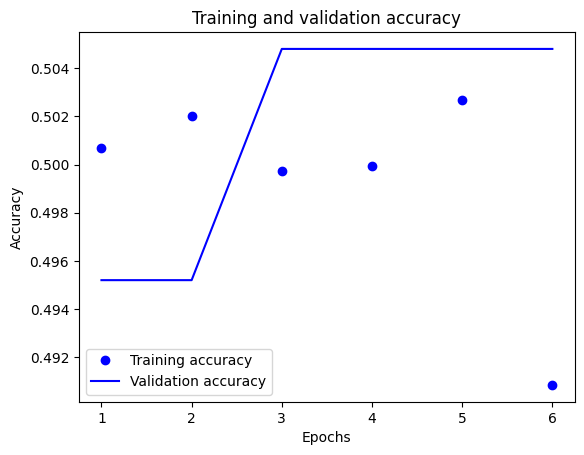

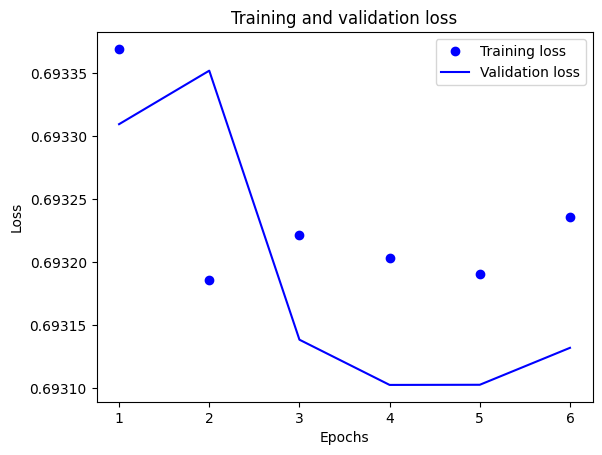

In [45]:
# Plot the training and validation accuracy over epochs to visualize the model's learning process
history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()

# Plot the training and validation loss over epochs to visualize overfitting or underfitting
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()